In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected=True)

### Data Exploration

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Data Visualization

In [8]:
plt.style.use('fivethirtyeight')

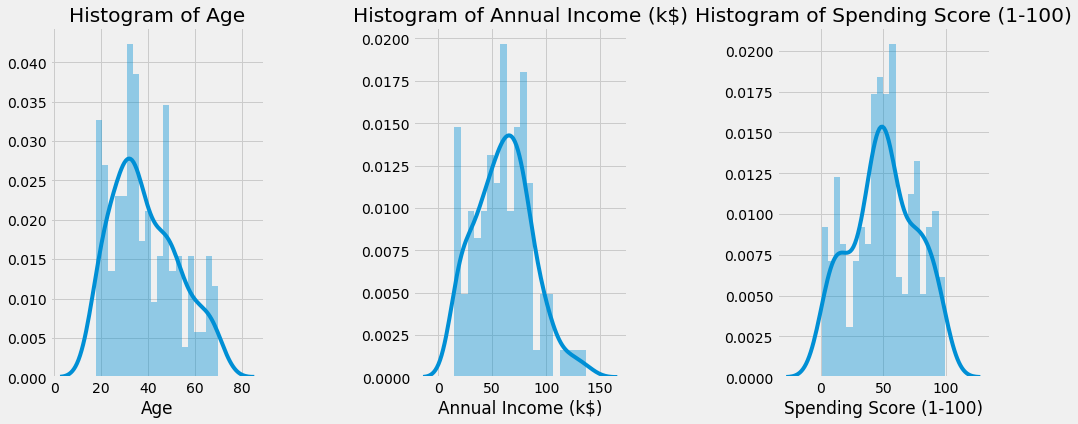

In [9]:
# Plotting histomgram of age, annual income and spending score

plt.figure(1,figsize=(15,6))
l=['Age','Annual Income (k$)','Spending Score (1-100)']
n=0
for x in l:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.7)
    sns.distplot(df[x],bins=20)
    plt.title('Histogram of {}'.format(x))
plt.show()

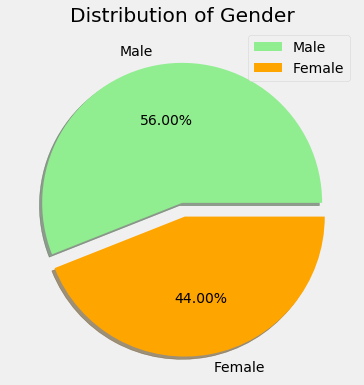

In [10]:
plt.figure(figsize=(10,6))
plt.pie(df['Gender'].value_counts(),colors=['lightgreen','orange'],labels=['Male','Female'], explode=[0,0.1], shadow=True,
       autopct='%.2f%%')
plt.title('Distribution of Gender')

plt.legend()
plt.show()

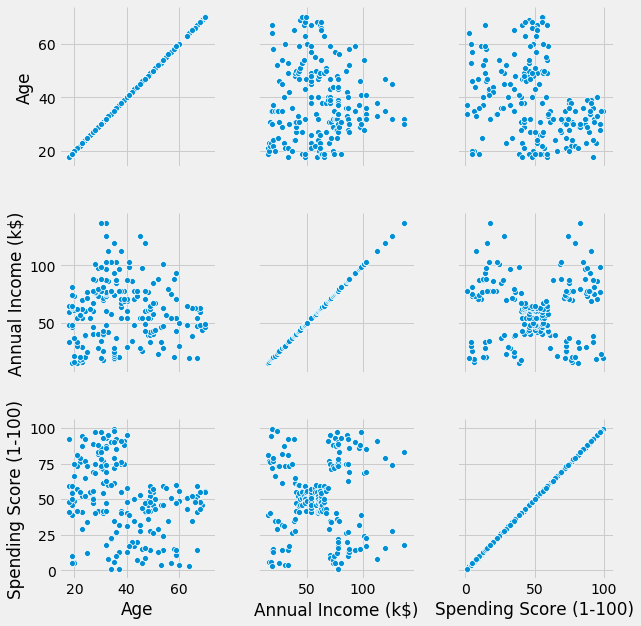

In [11]:
# Plotting the correlation between Age, Income and  Spending Score
sns.pairplot(df,x_vars=['Age','Annual Income (k$)','Spending Score (1-100)'],
             y_vars=['Age','Annual Income (k$)','Spending Score (1-100)'], height=3,diag_kind=None)

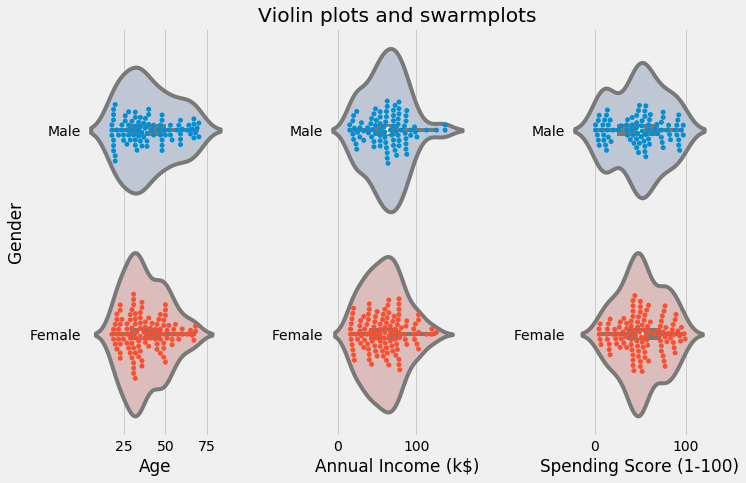

In [12]:
# Gender-wise distribution of Age, Annual Income and Spending Score
plt.figure(1,figsize=(10,7))
cols=['Age','Annual Income (k$)','Spending Score (1-100)']
n=0
for x in cols:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.7)
    sns.violinplot(x=x,y='Gender', data=df,palette='vlag')
    sns.swarmplot(x=x,y='Gender',data=df)
    plt.title('Violin plots and swarmplots' if n==2 else '')
    plt.ylabel('Gender' if n==1 else '')
plt.show()

### Clustering Using Age and Spending Score

In [13]:
# Selecting n clusters based on inertial (squared distance between data points and centroid. The less its value, the better)

X1=df[['Age','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
    algorithm=(KMeans(n_clusters=n,random_state=111,algorithm='elkan'))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

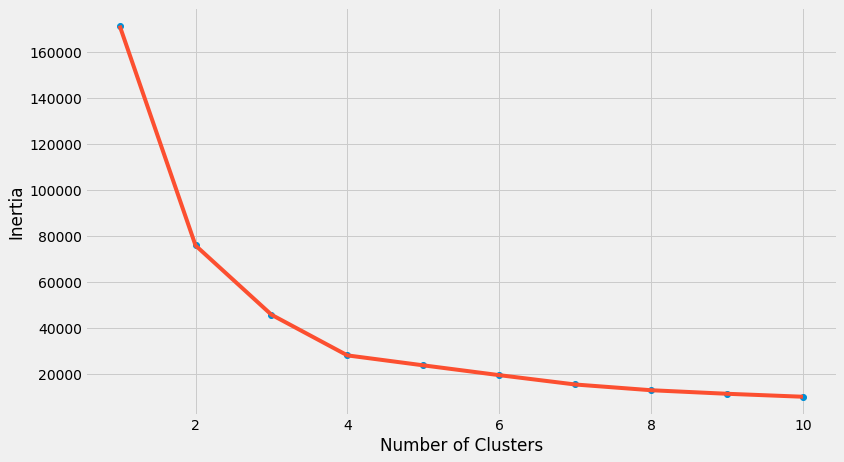

In [14]:
# Plotting inertia vs. number of clusters to find the elbow point

plt.figure(figsize=(12,7))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [15]:
# Applying the algorithm using n=4

algorithm=(KMeans(n_clusters=4,algorithm='elkan'))
algorithm.fit(X1)
labels1=algorithm.labels_
centroids1=algorithm.cluster_centers_

In [16]:
h=0.02
x_min,x_max=X1[:,0].min()-1,X1[:,0].max()+1
y_min,y_max=X1[:,1].min()-1,X1[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
Z=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])

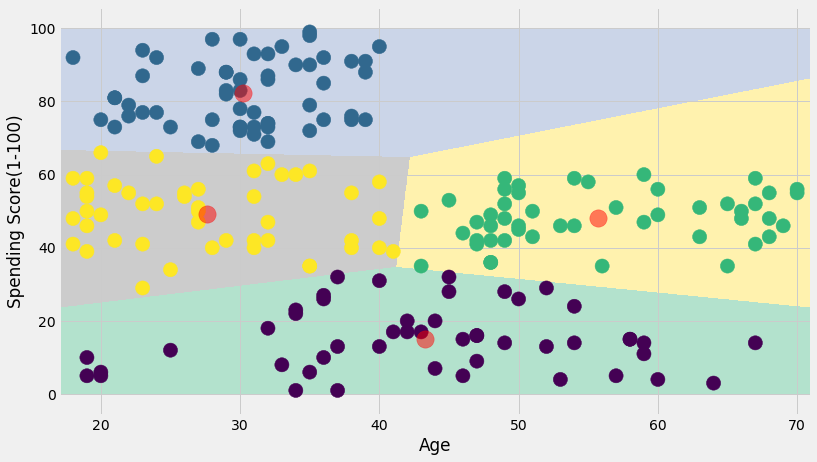

In [17]:
plt.figure(figsize=(12,7))
plt.clf()
Z=Z.reshape(xx.shape)
plt.imshow(Z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),
          cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter(x='Age',y='Spending Score (1-100)',data=df,c=labels1,s=200)
plt.scatter(x=centroids1[:,0],y=centroids1[:,1],s=300,c='red',alpha=0.5)
plt.xlabel('Age'),plt.ylabel('Spending Score(1-100)')
plt.show()

### Clustering using Annual Income and Spending Score

In [18]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

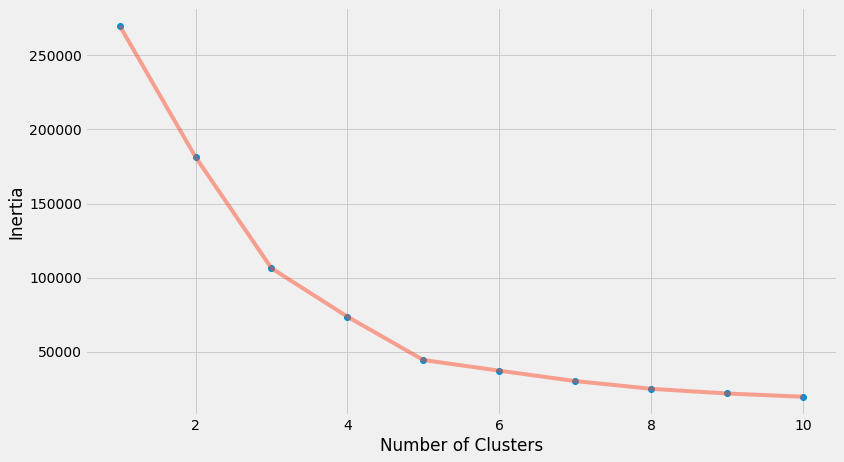

In [19]:
plt.figure(1 , figsize = (12 ,7))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
# Applying clustering for n=5

algorithm=(KMeans(n_clusters=5,algorithm='elkan'))
algorithm.fit(X2)
labels2=algorithm.labels_
centroids2=algorithm.cluster_centers_

In [21]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

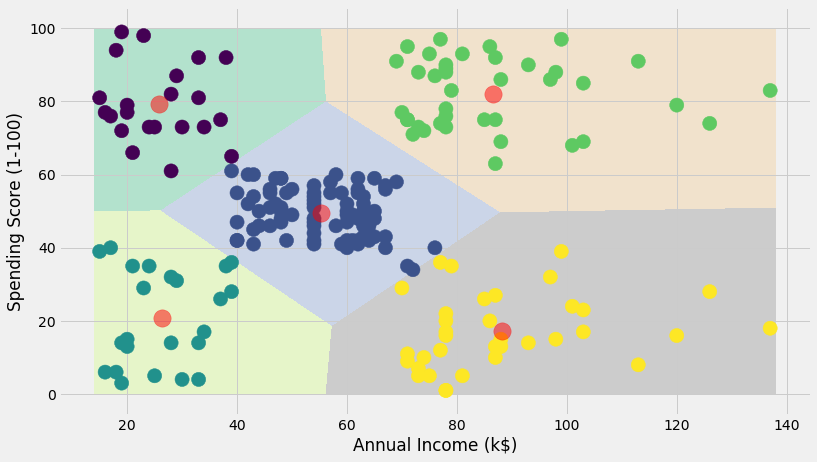

In [22]:
plt.figure(1 , figsize = (12 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [23]:
# Clustering using Age , Annual Income and Spending Score

X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

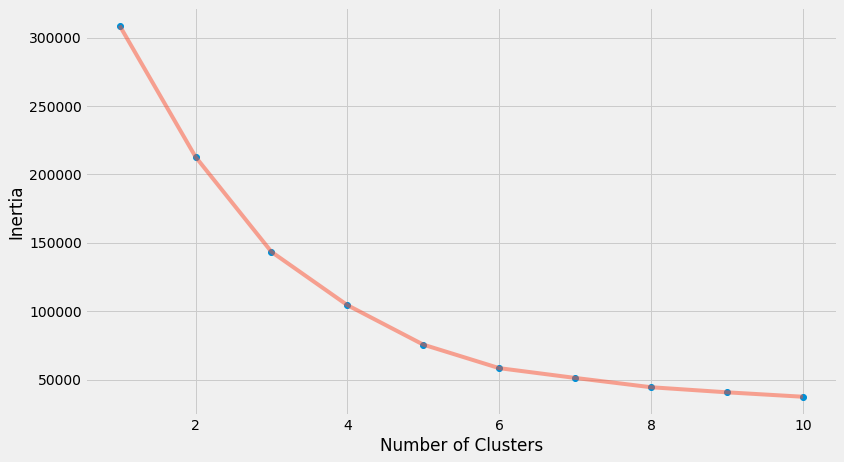

In [24]:
plt.figure(1 , figsize = (12 ,7))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [25]:
# Applying clustering for n=6

algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [26]:
# Displaying clusters in 3d

df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'], 
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)